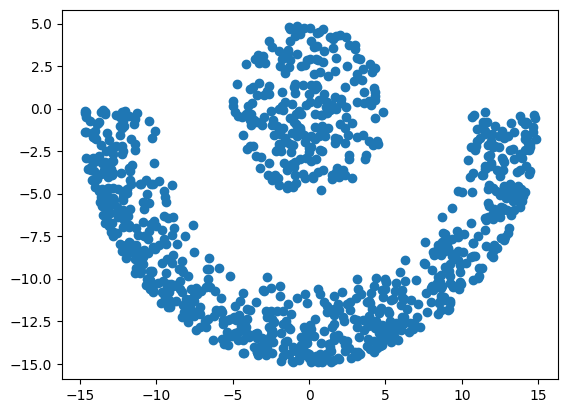

In [383]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('cm_dataset_2.csv', header = None)
plt.scatter(df[0],df[1])

In [384]:
data = df.to_numpy()
df = pd.DataFrame(data)
data.shape

(1000, 2)

In [387]:
data = data.T
data.shape

(2, 1000)

In [388]:
import random
from scipy.spatial import Voronoi, voronoi_plot_2d
K = 5
indices = random.sample(range(0, 1000), K)
print(indices)
means = np.zeros(shape=(2,K))
for i in range(len(indices)):
    means[:,i] = data[:,indices[i]]
means

[370, 423, 956, 767, 898]


array([[-13.524 ,  12.299 ,  12.951 ,  11.382 ,   9.7105],
       [ -4.699 ,  -8.1764,  -5.9727,  -1.01  ,  -7.1992]])

In [494]:
def KMeans_alg_vor(data, K):
    error_hist = []
    max_it = 1000
    it = 0
    random.seed(120)
    indices = random.sample(range(0, data.shape[1]), K)
    means = np.zeros(shape=(data.shape[0],K))
    for i in range(len(indices)):
        means[:,i] = data[:,indices[i]]



    while it < max_it:
        Z = []
        for i in range(data.shape[1]):
            dis_Kmeans = []
            for k in range(K):
                dis_Kmeans.append((np.linalg.norm(data[:,i] - means[:,k]))**2)
            Z.append(dis_Kmeans.index(min(dis_Kmeans)))



        re_mean = np.zeros(shape=(data.shape[0],K))
        for i in range(data.shape[1]):
            re_mean[:,Z[i]] = re_mean[:,Z[i]] + data[:,i]
        for k in range(K):
            re_mean[:,k] = re_mean[:,k]/(Z.count(k))
        re_mean



        error = 0
        for i in range(data.shape[1]):
            error = error + (np.linalg.norm(data[:,i] - re_mean[:,Z[i]]))**2
        error_hist.append(error)



        if it >= 8:
            if abs(error_hist[-2] - error_hist[-1]) < 1:
                break
        means = re_mean
        it = it + 1
    return means, error_hist, Z

In [480]:
def KMeans_alg(data, K):
    error_hist = []
    max_it = 1000
    it = 0
    indices = random.sample(range(0, data.shape[1]), K)
    means = np.zeros(shape=(data.shape[0],K))
    for i in range(len(indices)):
        means[:,i] = data[:,indices[i]]



    while it < max_it:
        Z = []
        for i in range(data.shape[1]):
            dis_Kmeans = []
            for k in range(K):
                dis_Kmeans.append((np.linalg.norm(data[:,i] - means[:,k]))**2)
            Z.append(dis_Kmeans.index(min(dis_Kmeans)))



        re_mean = np.zeros(shape=(data.shape[0],K))
        for i in range(data.shape[1]):
            re_mean[:,Z[i]] = re_mean[:,Z[i]] + data[:,i]
        for k in range(K):
            re_mean[:,k] = re_mean[:,k]/(Z.count(k))
        re_mean



        error = 0
        for i in range(data.shape[1]):
            error = error + (np.linalg.norm(data[:,i] - re_mean[:,Z[i]]))**2
        error_hist.append(error)



        if it >= 8:
            if abs(error_hist[-2] - error_hist[-1]) < 1:
                break
        means = re_mean
        it = it + 1
    return means, error_hist, Z

In [481]:
def vis_KMeans(data, K):
    m, e_l, Z = KMeans_alg(data, K)
    sns.set(rc={'figure.figsize':(20,5)})
    figure, axes = plt.subplots(1, 2)
    sc = sns.scatterplot(x = data[0], y = data[1], hue = Z, ax = axes[0])
    sc.set(xlabel ="X", ylabel = "Y", title ='Clustering')
    lp = sns.lineplot(x = list(range(0,len(e_l))), y = e_l, ax = axes[1])
    lp.set(xlabel ="Iterations", ylabel = "Error", title ='Error History')
    return(plt.show())

Random Initialisation 1


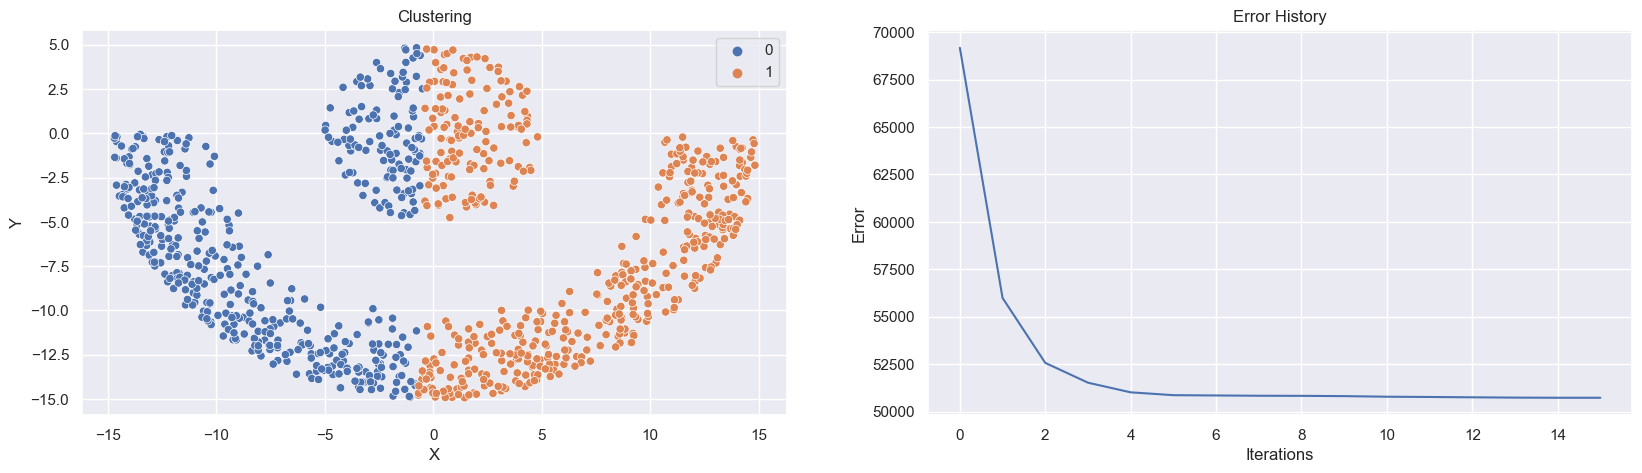

Random Initialisation 2


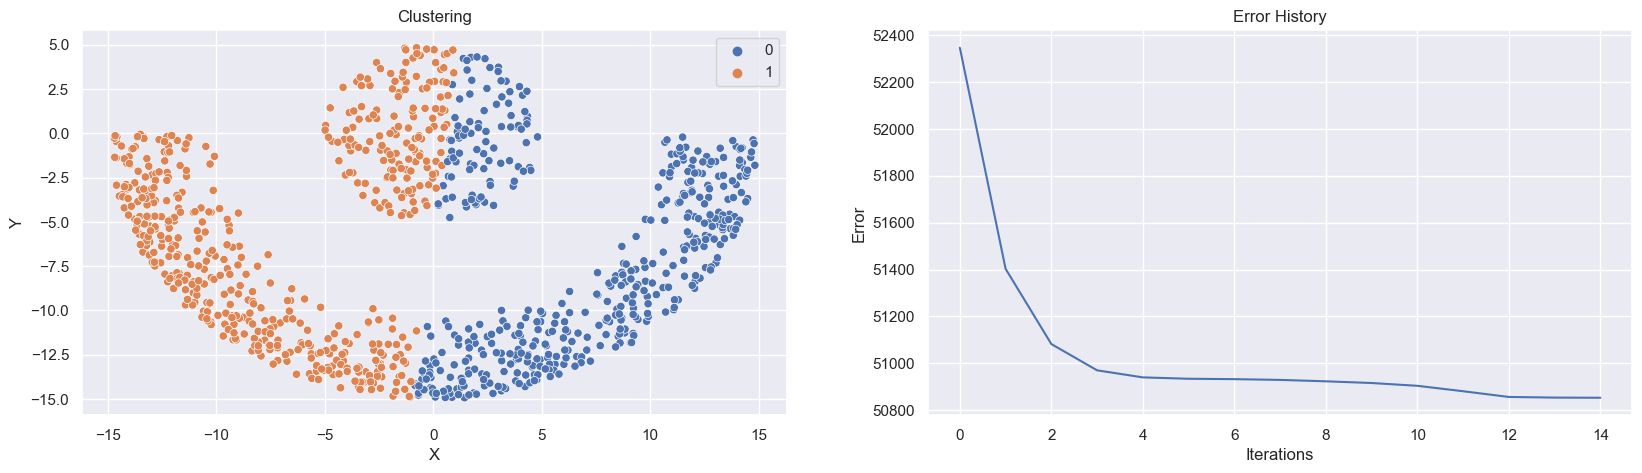

Random Initialisation 3


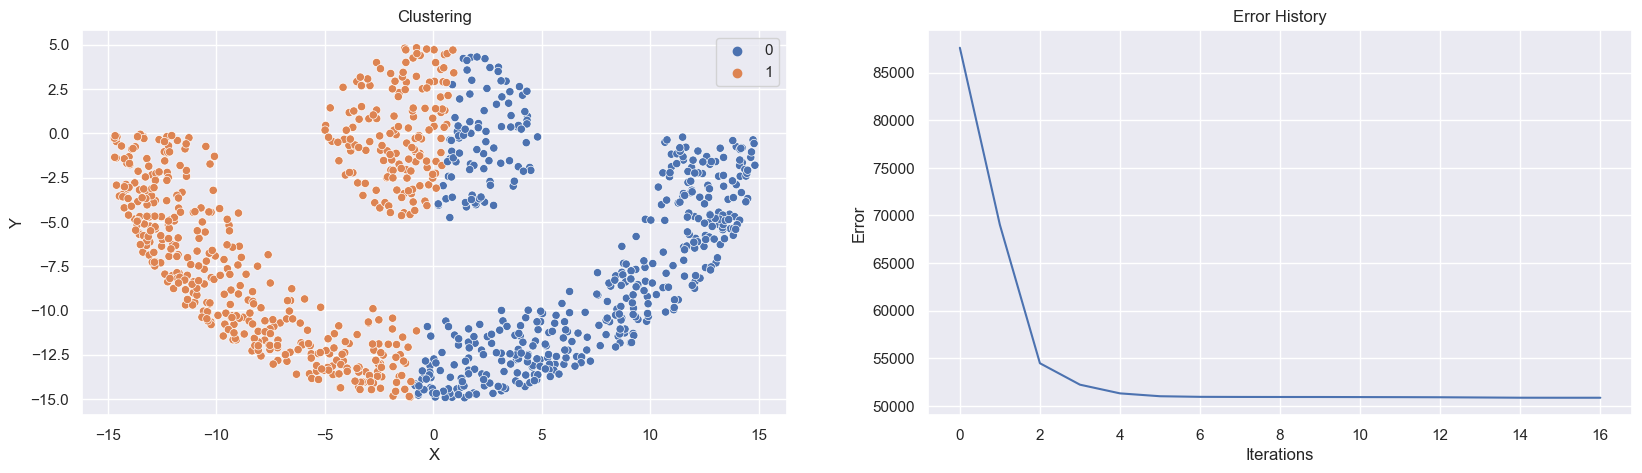

Random Initialisation 4


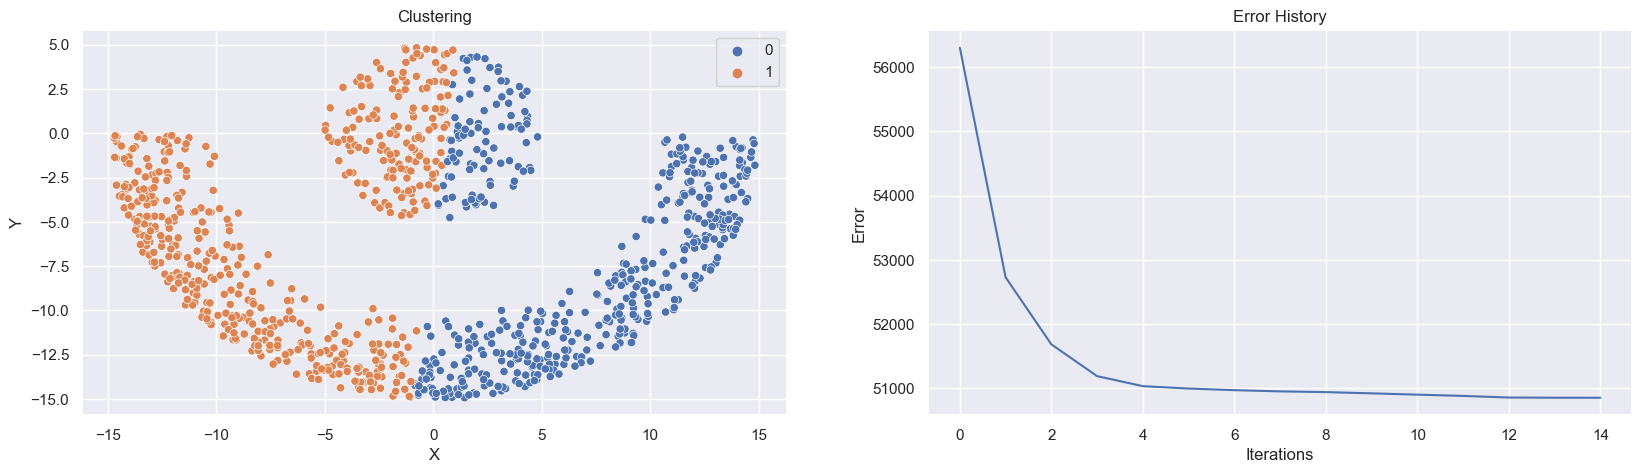

Random Initialisation 5


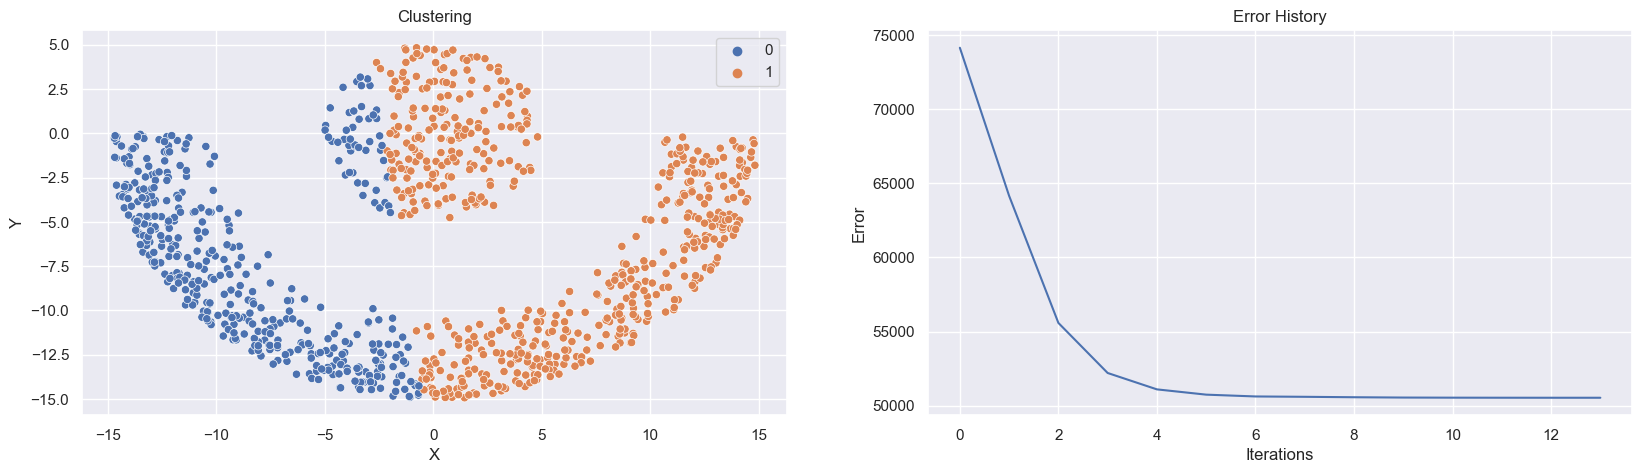

In [534]:
for i in range(1,6):
    print("Random Initialisation",i)
    vis_KMeans(data, 2)

In [549]:
def vis_vor(data, K):
    cm, e_li, Z_indice = KMeans_alg_vor(data, K)
    vor = Voronoi(cm.T)
    fig = voronoi_plot_2d(vor,show_points=False,show_vertices=False,label='Vornoi boundaries')
    sns.set(rc={'figure.figsize':(8,5)})
    s = sns.scatterplot(x = data[0],y = data[1],hue = Z_indice)
    sns.scatterplot(x = cm[0], y = cm[1], marker = '*', color = 'red', s =100)
    s.set_xlim((min(data[0])),(max(data[0])))
    s.set_ylim(min(data[1]) ,max(data[1]))
    s.set(xlabel ="1st Feature of dataset", ylabel = "2nd Feature of dataset", title ='Clustering with K = {}'.format(K))
    return(plt.show())

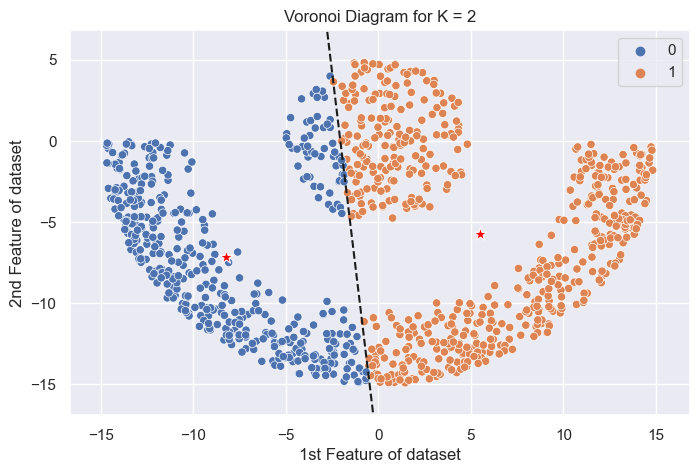

In [579]:
m2, er, z2 = KMeans_alg_vor(data, 2)

vor2 = sns.scatterplot(x = data[0], y = data[1], hue = z2)
vor2.set_xlim((min(data[0]) - 2),(max(data[0]) +2))
vor2.set_ylim(min(data[1])-2 ,max(data[1])+2)
sns.scatterplot(x = m2[0], y = m2[1], marker = '*', color = 'red', s =100)
vor2.set(xlabel ="1st Feature of dataset", ylabel = "2nd Feature of dataset", title ='Voronoi Diagram for K = 2')
slope, intercept = np.polyfit(m2[0], m2[1], 1)
per = -1/slope
bisec = (m2[:,0] + m2[:,1])/2
c = bisec[1] - per*bisec[0]
x = np.linspace(-5,5,100)
y = per*x + c
plt.plot(x, y, ls = '--', color = 'k')

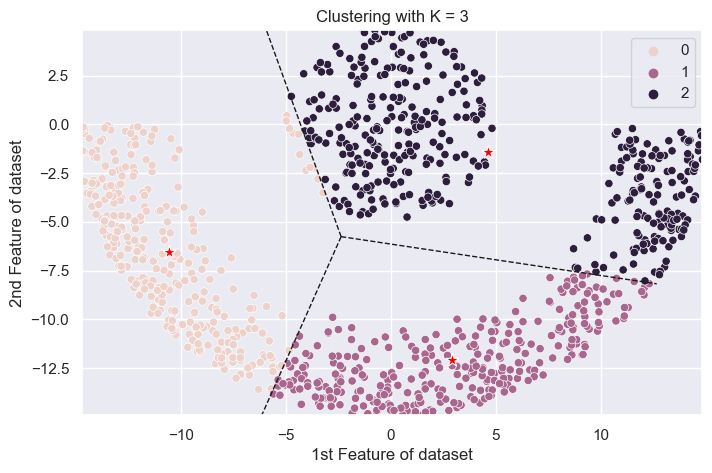

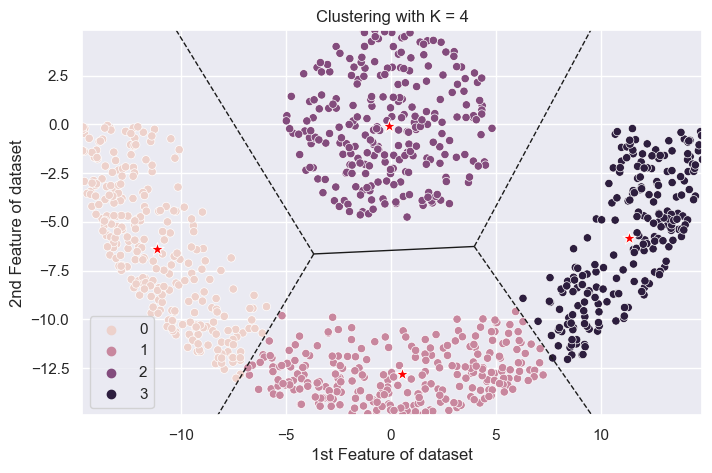

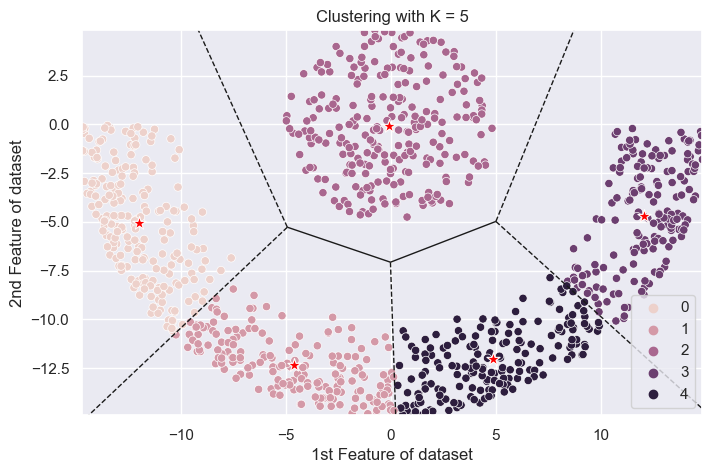

In [550]:
for i in range(3,6):
    vis_vor(data, i)

In [518]:
def Kernel_M_rbf(data, sigma = 0.2):
    Kernel = np.zeros(shape = (1000,1000))
    for i in range(1000):
        for j in range(1000):
            x_i = data[:,i].reshape(2,1)
            #x_i = x_i/np.linalg.norm(x_i)
            x_j = data[:,j].reshape(2,1)
            #x_j = x_j/np.linalg.norm(x_j)
            Kernel[i][j] = np.exp(-(((x_i-x_j).T)@(x_i-x_j)/(2*sigma*sigma)))
    return Kernel, sigma

In [519]:
def Kernel_M_poly(data, d = 2):
    Kernel = np.zeros(shape = (1000,1000))
    for i in range(1000):
        for j in range(1000):
            x_i = data[:,i].reshape(2,1)
            #x_i = x_i/np.linalg.norm(x_i)
            x_j = data[:,j].reshape(2,1)
            #x_j = x_j/np.linalg.norm(x_j)
            Kernel[i][j] = ((x_i.T)@(x_j) + 1)**d
    return Kernel, d

In [528]:
def Laplacian(data):
    K = Kernel_M_rbf(data, sigma = 0.5)[0]
    D = K.sum(axis=1) 
    D = np.sqrt(1/D)
    L = np.multiply(D[np.newaxis,:], np.multiply(K,D[:,np.newaxis]))
    return(L)

In [365]:
Kernel.shape

(1000, 1000)

In [524]:
def spec_clus_rbf(Kernel, hp):
    H = np.zeros(shape=(1000,2))
    e_val, e_vec = np.linalg.eigh(Kernel)
    for i in range(2):
        H[:,i] = e_vec[:, 999-i]
    for i in range(1000):
        H[i] = H[i]/np.linalg.norm(H[i])
    mean,error,z = KMeans_alg(H.T, 2)
    sns.set(rc={'figure.figsize':(10,5)})
    gg = sns.scatterplot(x = data[0], y = data[1], hue = z)
    gg.set(xlabel ="1st Feature of dataset", ylabel = "2nd Feature of dataset", title ='Gaussian kernel with sigma = {}'.format(hp))
    return(plt.show())

In [521]:
def spec_clus_poly(Kernel, hp):
    H = np.zeros(shape=(1000,2))
    e_val, e_vec = np.linalg.eigh(Kernel)
    for i in range(2):
        H[:,i] = e_vec[:, 999-i]
    for i in range(1000):
        H[i] = H[i]/np.linalg.norm(H[i])
    mean,error,z = KMeans_alg(H.T, 2)
    sns.set(rc={'figure.figsize':(10,5)})
    gg = sns.scatterplot(x = data[0], y = data[1], hue = z)
    gg.set(xlabel ="1st Feature of dataset", ylabel = "2nd Feature of dataset", title ='Polynomial kernel with degree = {}'.format(hp))
    return(plt.show())

In [526]:
def spec_clus_Lap(Kernel):
    H = np.zeros(shape=(1000,2))
    e_val, e_vec = np.linalg.eigh(Kernel)
    for i in range(2):
        H[:,i] = e_vec[:, 999-i]
    for i in range(1000):
        H[i] = H[i]/np.linalg.norm(H[i])
    mean,error,z = KMeans_alg(H.T, 2)
    sns.set(rc={'figure.figsize':(10,5)})
    gg = sns.scatterplot(x = data[0], y = data[1], hue = z)
    gg.set(xlabel ="1st Feature of dataset", ylabel = "2nd Feature of dataset", title ='Clustering using Laplacian Matrix')
    return(plt.show())

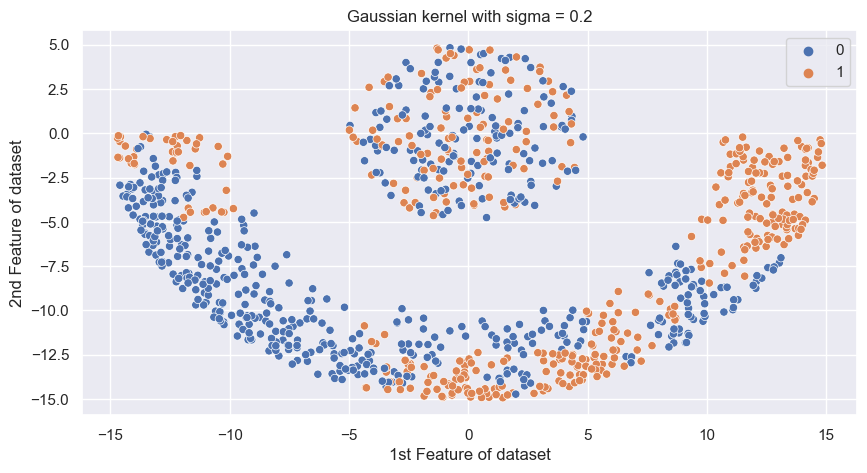

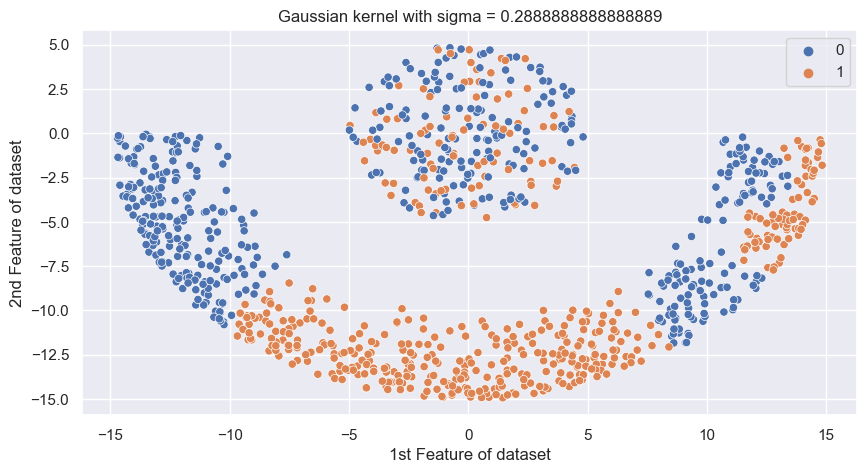

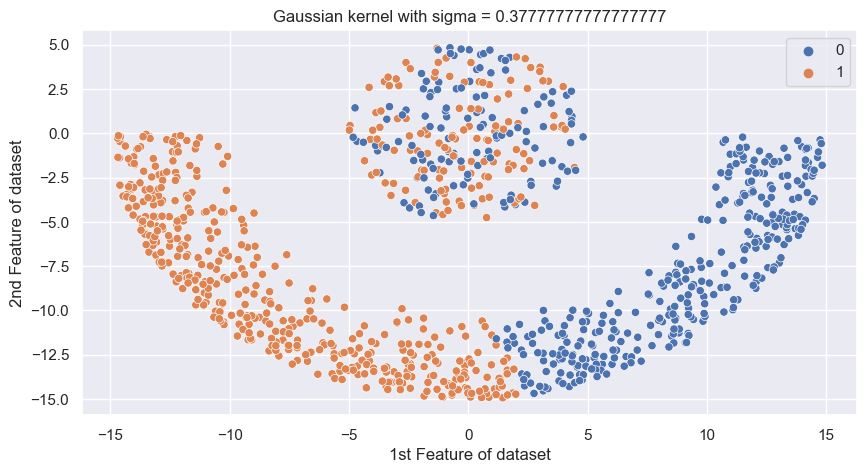

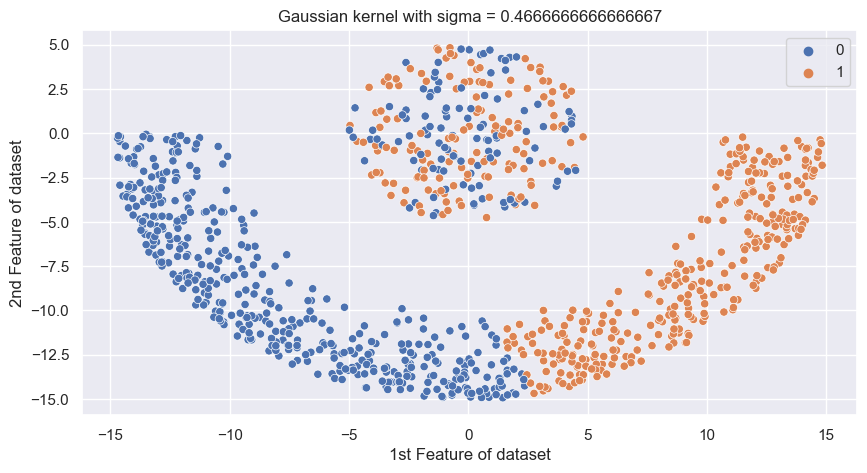

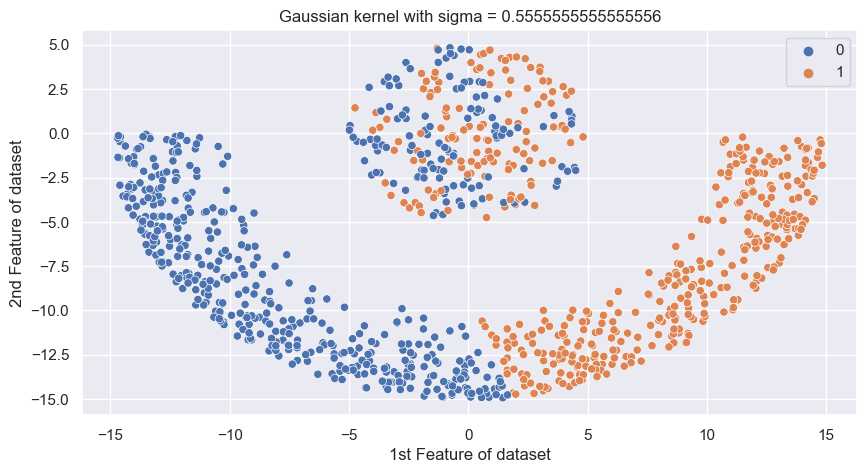

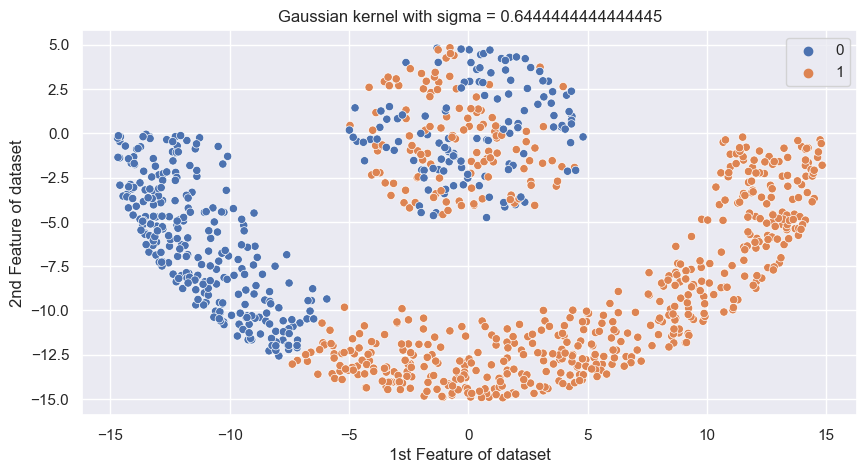

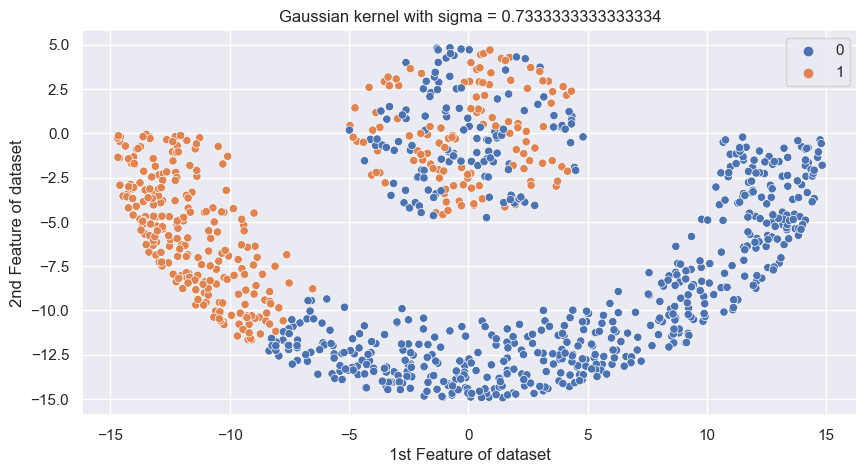

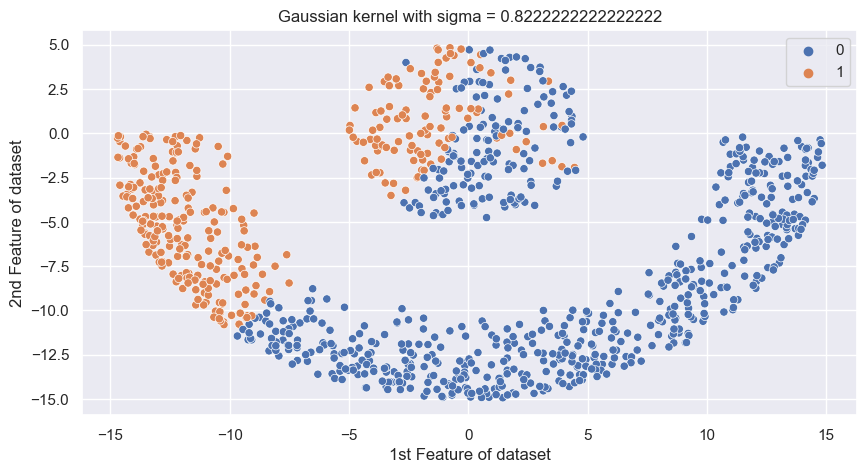

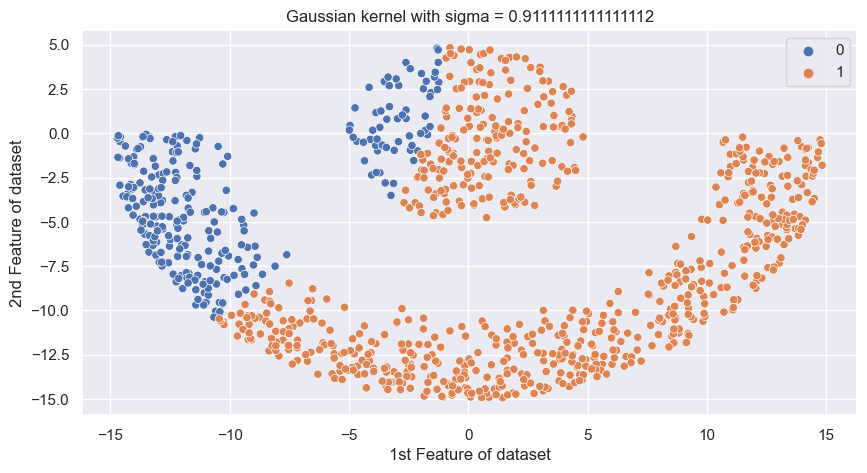

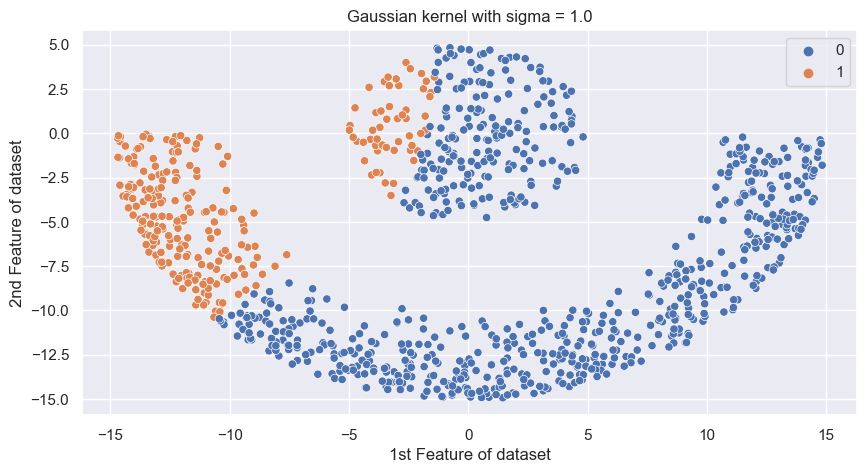

In [525]:
l = np.linspace(0.2, 1, 10)
for i in l:
    spec_clus_rbf(Kernel_M_rbf(data, sigma = i)[0], Kernel_M_rbf(data, sigma = i)[1])

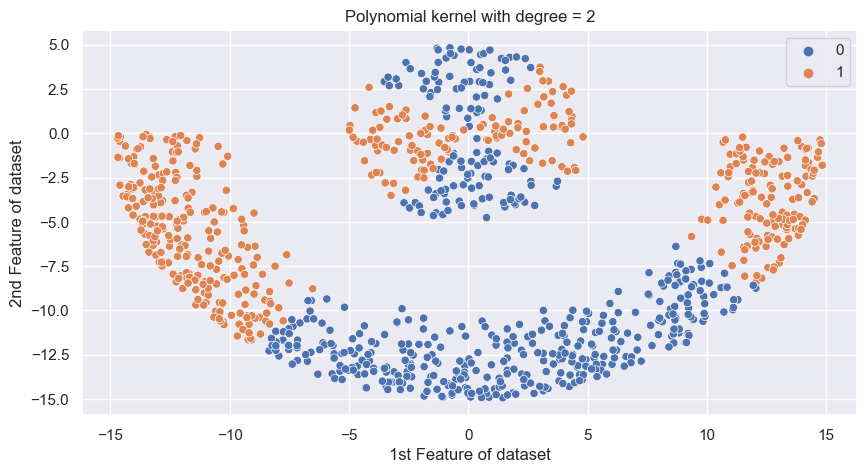

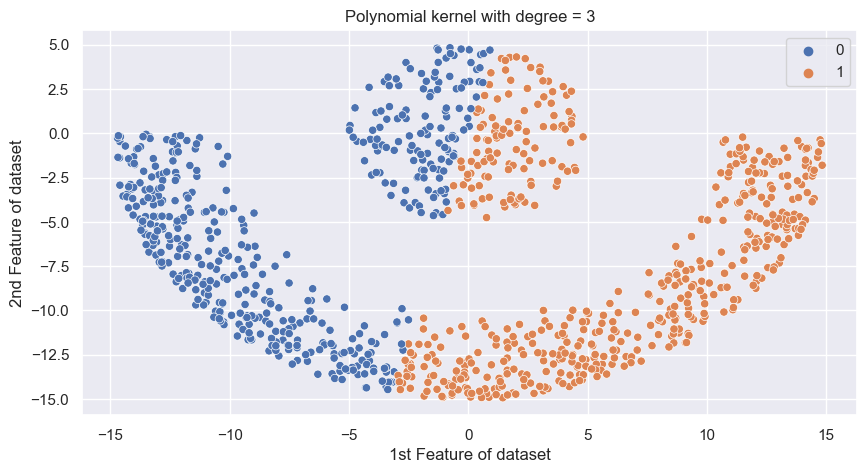

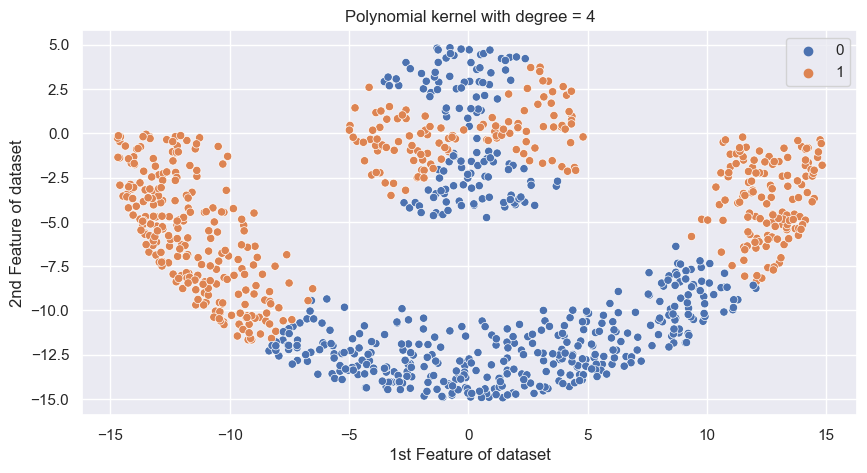

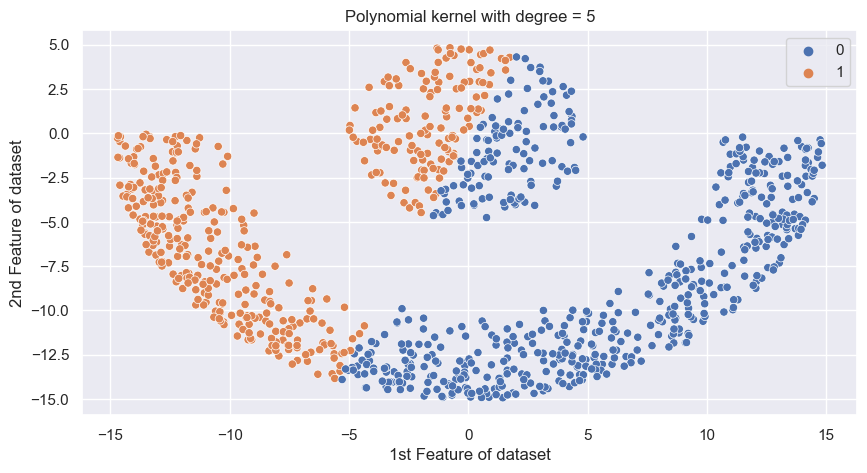

In [523]:
for i in range(2,6):
    spec_clus_poly(Kernel_M_poly(data, d = i)[0], Kernel_M_poly(data, d = i)[1])

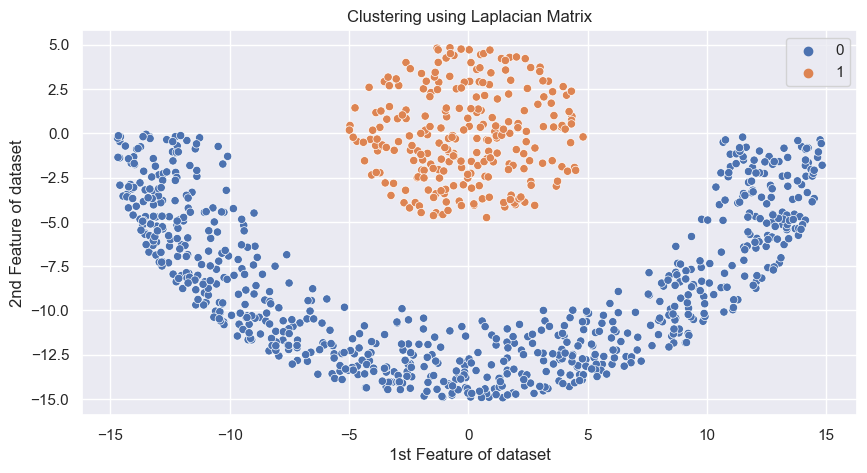

In [529]:
spec_clus_Lap(Laplacian(data))

In [552]:
def diff_clus(ye):
    why = np.zeros(shape=(1000,2))
    lol_Z = []
    #ye = Kernel_M(data, sigma = 0.8)
    e1, e2 = np.linalg.eigh(ye)
    for i in range(2):
        why[:,i] = e2[:,999-i]
    for i in range(1000):
        if abs(why[i][0]) > abs(why[i][1]):
            lol_Z.append(0)
        else:
            lol_Z.append(1)
    return(lol_Z)

[Text(0.5, 0, '1st Feature of dataset'),
 Text(0, 0.5, '2nd Feature of dataset'),
 Text(0.5, 1.0, 'Clustering using Method mentioned in 4th subpart')]

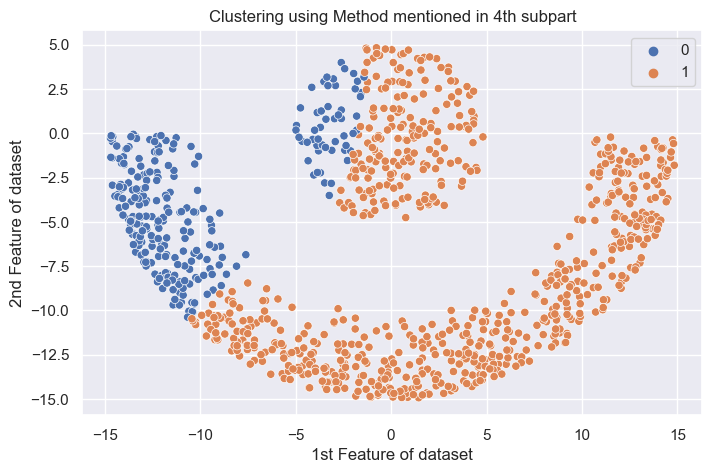

In [554]:
diff_c = sns.scatterplot(x = data[0], y = data[1], hue = diff_clus(Kernel_M_rbf(data, sigma = 1)[0]))
diff_c.set(xlabel ="1st Feature of dataset", ylabel = "2nd Feature of dataset", title ='Clustering using Method mentioned in 4th subpart')